<a href="https://colab.research.google.com/github/PraDEEP6393/Stock-Price-Prediction-using-Deep-Learning/blob/main/Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory(LSTM) based - Stock predicition


Aim -to predict the Closing_Price_Prediction using past 60 day stock price.

In [1]:
import math
import numpy as np
import pandas as pd
#import pandas_datareader as web
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

## Data prep

Works on Yahoo based data.

In [2]:
ticker = 'TATAMOTORS.NS'

Change start and end date for collection, as per Company.  (Start date cant be before the company was founded.)

In [3]:

df = yf.download(ticker, start="2015-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
df

/tmp/ipython-input-3614226086.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,
2015-01-01,485.740906,486.715401,479.698977,481.891621,944551
2015-01-02,498.750519,504.207751,484.571497,484.571497,4193093
2015-01-05,510.444580,512.588469,493.780595,497.093908,6758676
2015-01-06,488.615692,501.235492,486.520498,501.235492,7979598
2015-01-07,481.258179,487.641150,476.726717,482.378848,9232656
...,...,...,...,...,...
2025-08-25,686.799988,688.900024,680.299988,683.750000,6429311
2025-08-26,681.650024,686.950012,678.299988,686.799988,7496633


In [4]:
df.shape

(2633, 5)

In [ ]:
#choose plotting style

#plt.style.use('fivethirtyeight')

#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

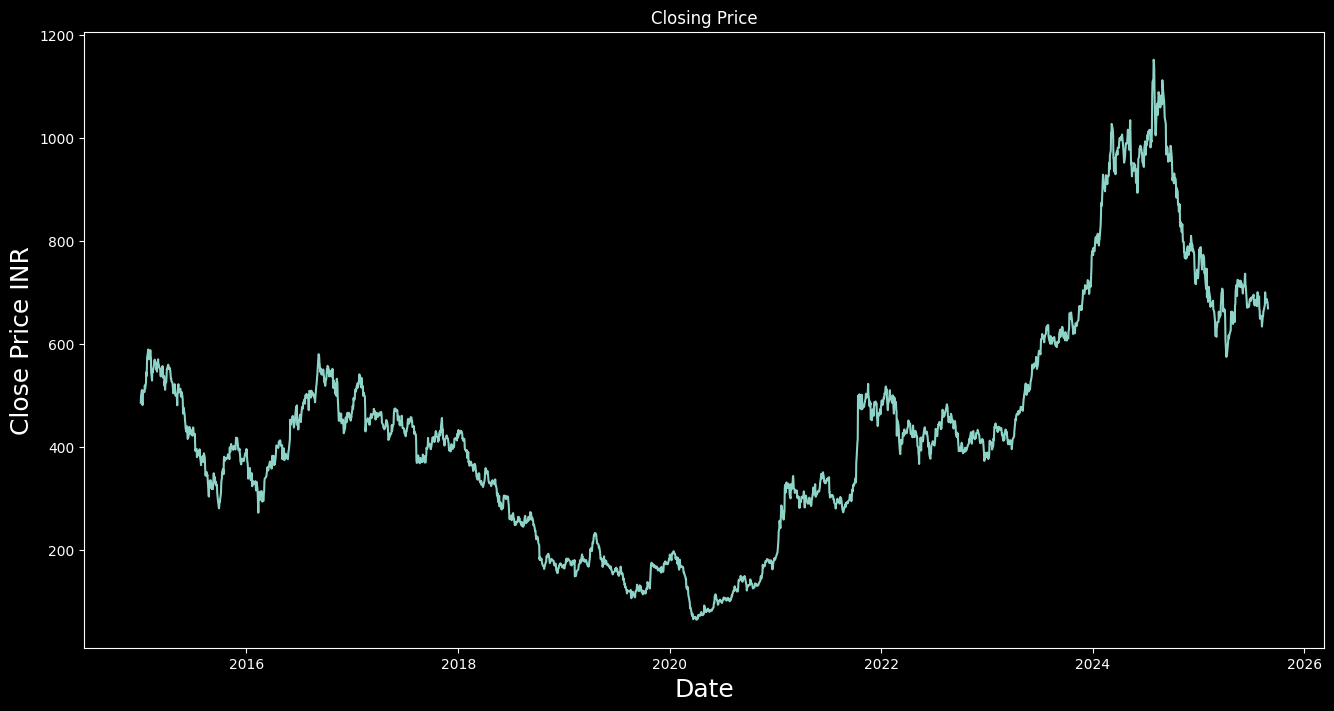

In [5]:
plt.style.use('dark_background')
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [6]:
data=df.filter(like='Close')
print(data.head())

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

Price              Close
Ticker     TATAMOTORS.NS
Date                    
2015-01-01    485.740906
2015-01-02    498.750519
2015-01-05    510.444580
2015-01-06    488.615692
2015-01-07    481.258179


2107

In [7]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.38745535],
       [0.39941709],
       [0.41016924],
       ...,
       [0.56758474],
       [0.56188411],
       [0.55595363]])

In [8]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.38745535, 0.39941709, 0.41016924, 0.39009858, 0.38333369,
       0.3995963 , 0.40882519, 0.40882519, 0.40627157, 0.40707795,
       0.41836777, 0.41191645, 0.42334059, 0.44188798, 0.43498871,
       0.44842888, 0.46809629, 0.48252207, 0.46876831, 0.47719088,
       0.46513943, 0.47172511, 0.48140205, 0.47073949, 0.46876831,
       0.44224641, 0.42705898, 0.44627839, 0.44161917, 0.44421759,
       0.44757766, 0.45528331, 0.46437784, 0.45743373, 0.46043537,
       0.4553282 , 0.44654726, 0.44995206, 0.44318719, 0.45617936,
       0.46500503, 0.45523864, 0.45523864, 0.45219205, 0.4471745 ,
       0.44278403, 0.43445115, 0.44609921, 0.44112639, 0.43982712,
       0.45295369, 0.44278403, 0.43704957, 0.43149418, 0.43494387,
       0.41774048, 0.42634217, 0.41057245, 0.42051814, 0.42468459])]
[np.float64(0.4338238471443899)]



In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2047, 60, 1)

## Model training

In [11]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3 )

Epoch 1/3
2047/2047 ━━━━━━━━━━━━━━━━━━━━ 59s 29ms/step - loss: 1.8843e-04
Epoch 2/3
2047/2047 ━━━━━━━━━━━━━━━━━━━━ 57s 28ms/step - loss: 1.4125e-04
Epoch 3/3
2047/2047 ━━━━━━━━━━━━━━━━━━━━ 95s 34ms/step - loss: 1.3253e-04


## Testing and Validating model

In [15]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [16]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [17]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [18]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [19]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



np.float64(88.33413452612584)

/tmp/ipython-input-4219004125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


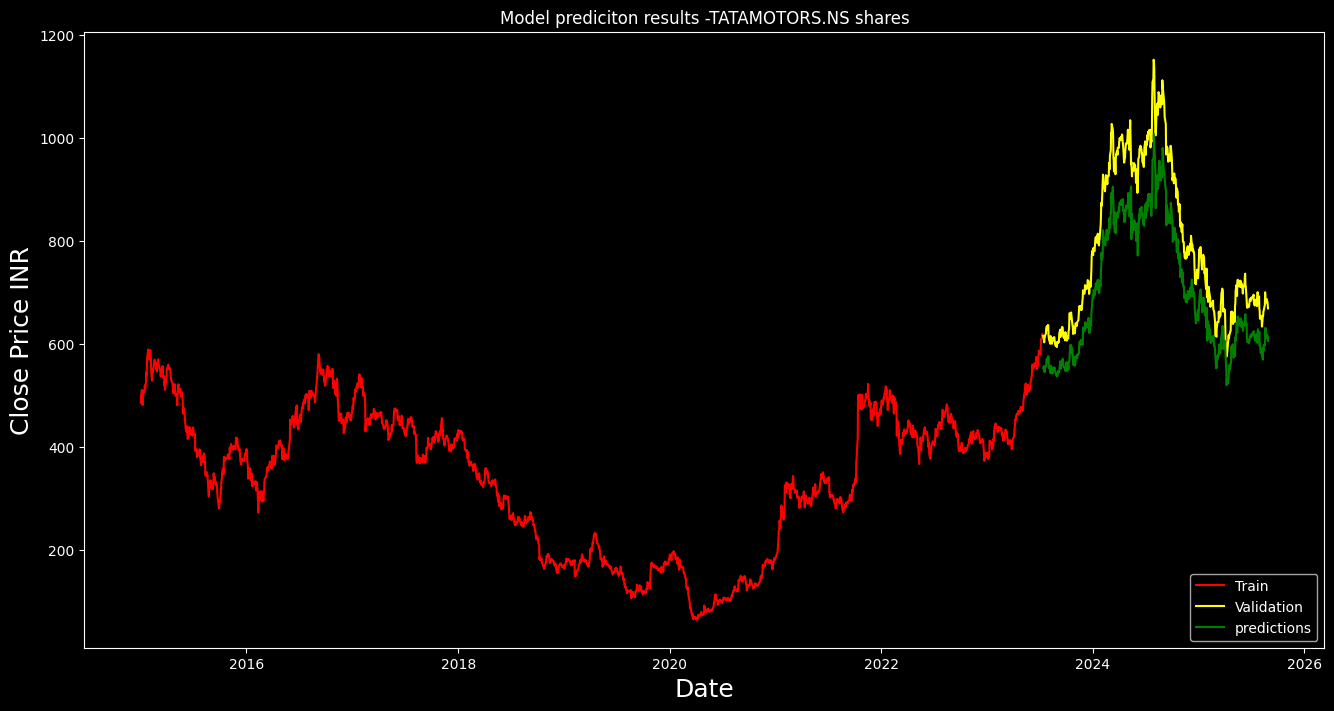

In [21]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.style.use('dark_background')
plt.figure(figsize=(16,8))
plt.title(f'Model prediciton results -{ticker} shares')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()

In [22]:
#Show the valid and predicted prices

valid.tail(15)

Price,Close,predictions
Ticker,TATAMOTORS.NS,
Date,,
2025-08-08,633.700012,581.011108
2025-08-11,653.750000,569.576416
2025-08-12,654.099976,592.462585
2025-08-13,663.750000,587.008850
2025-08-14,664.599976,598.052795
2025-08-18,676.000000,596.680359
2025-08-19,700.250000,609.015259
2025-08-20,689.599976,631.203186


# Getting predicitions - for tomorrow

In [23]:
#Get the quote
stock_quote = yf.download(ticker, start="2015-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))

new_df=stock_quote.filter(like='Close')
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Price of {ticker} tomorrow:{pred_price}')

/tmp/ipython-input-248193587.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_quote = yf.download(ticker, start="2015-01-01", end=pd.Timestamp.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Price of TATAMOTORS.NS tomorrow:[[601.05164]]
